## Chi-square test
by Tonatiuh Rangel

## Contents:    
1. [Theory](#theory)   
2. [Numerical example](#example)
3. [Scipy's example](#scipy)


<a id='theory'></a>
Also called "Goodness of fit test".   
This is also used to test if two distributions are consistent.   


### Hypothesis    
**Null hypothesis**: observed and expected values are consistent    
**Alternative hypothesis**: observed and expected values are significantly different    

### Test statistic    
The test statistic (CV) is computed as    

$\chi^2 = \sum_i (O_i - E_i)^2/E_i$

where $O_i$ and $E_i$ are observed and expected frequency counts. 

### P-value   
after computing CV and degrees of freedom ($= n - 1$), 
we estimate the probability of P(chi2 $\leq$ CV).    
This is done using the CDF for chi2, as shown in this notebook.    

**Note** $\chi^2$ is the ratio between non negative values, so we need to shift our data to the positive scale before doing chi-square tests.

<a id='example'></a>   
### Toy exercise  

Lets build a given set of observed and expected values.     


In [1]:
import numpy as np

mean=4
std=2.0 #std
D = np.random.gamma(mean, std, 1000)
noise = np.random.normal(0,2,1000)

# Expected distribution
E = D 
# Observed distribution (we add some noise)
O = D + noise

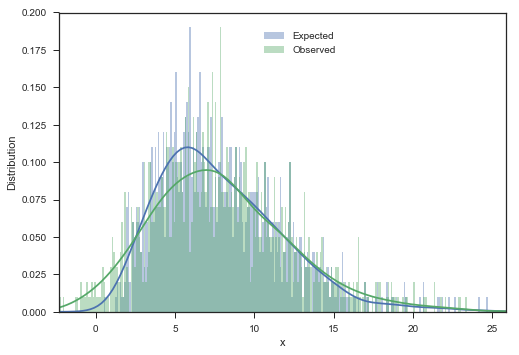

In [2]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
#df = sns.load_dataset("anscombe")

minval = np.array([O.min(),E.min()]).min()
maxval = np.array([O.max(),E.max()]).max()

bins = np.arange(minval,maxval,0.1)

# Show the results of a linear regression within each dataset
ax1 = sns.distplot(E,bins=bins,label='Expected')
ax2 = sns.distplot(O,bins=bins,label='Observed')

plt.pyplot.xlabel('x')
plt.pyplot.ylabel('Distribution')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=0, borderaxespad=0.)

plt.pyplot.xlim((minval,maxval))
plt.pyplot.show()

Let's evaluate with the Goodness of fit, whether the observed and expected sets are significantly different.    

In [3]:
import numpy as np
from scipy import stats

# Statistic   
cv = np.sum((O-E)**2/E)
print("Statistic",cv)
df=len(O)-1
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df)   # *


print("Critical value for 95% confidence",crit)

p_value = float(1.0 - stats.chi2.cdf(x=cv, df=df))
print("P value %12.6f" % p_value)

Statistic 672.700398041
Critical value for 95% confidence 1073.64265066
P value     1.000000


Our test statistic is lower than the critical value for 95% confidence, so we cannot accept the null hypothesis that the two samples are consistent.    
Note that the P-value is close to 1.

<a id='scipy'></a>   
### Scipy's $\chi^2$ test

Let's do the same test, using the scipy's implementation of $\chi^2$ test




In [4]:
stats.chisquare(f_obs = O,f_exp = E)


Power_divergenceResult(statistic=672.7003980413333, pvalue=0.99999999999999989)